# Libraries


In [1]:
!pip install googlesearch-python

In [2]:
# Import necessary libraries
from googlesearch import search
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


# Define Search Query

In [3]:
# Provide the info for the query
query = "Job at Perplexity"

# Google Search

In [4]:
# Perform Google search to get a list of SearchResult
# results = list(search(query, num_results=100, sleep_interval=5, lang="en"))
results = list(search(query, num_results=100, sleep_interval=5, lang="en",advanced=True))

results = [str(item) for item in results]

In [5]:
# Initialize an empty list to store search result data
data =[]
for result in results:
    # Extract URL, title, and description using string manipulation
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]

    # Create a dictionary for each SearchResult
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }

    # Append the dictionary to the data list
    data.append(result_dict)

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                                                   URL  \
0                https://www.perplexity.ai/hub/careers   
1            https://boards.greenhouse.io/perplexityai   
2    https://www.linkedin.com/company/perplexity-ai...   
3     https://www.aitalenthub.ai/careers/perplexity-ai   
4    https://www.linkedin.com/jobs/perplexity-jobs-...   
..                                                 ...   
96   https://www.ebay.com/itm/404992185403?chn=ps&m...   
97   https://www.perplexity.ai/page/Future-of-Work-...   
98   https://www.ventureloop.com/ventureloop/jobdet...   
99   https://wizardsourcer.com/unlocking-the-power-...   
100  https://readwrite.com/what-is-perplexity-ai-gu...   

                                                 Title  \
0                                   Perplexity Careers   
1                                Jobs at Perplexity AI   
2                                     Perplexity: Jobs   
3    Perplexity AI Careers and Opportunities - AI Jobs   
4            

# Extract and Store Results in DataFrame

# Text Cleaning

In [6]:
# Define patterns for text cleaning (if necessary)
date_time_pattern = r'\d{4}-\d{2}-\d{2}'  # Example pattern for date
url_pattern = r'http\S+|www\S+'  # Pattern for URLs
short_words_pattern = r'\b\w{1,2}\b'  # Pattern for short words
stop_words_pattern = r'\b(?:the|and|is|in|to|a|of)\b'  # Example pattern for stop words
special_characters_pattern = r'[^\w\s]'  # Pattern for special characters

# Define custom words to be removed, considering capital and plural forms
custom_words = ['job', 'apply', 'search', 'find']
custom_words_pattern = r'\b(?:' + '|'.join(custom_words) + r's?\b)'

# Apply text cleaning on the "Description" column
df['Description'] = df['Description'].str.replace(date_time_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(url_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(short_words_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(stop_words_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(special_characters_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(custom_words_pattern, '', regex=True, case=False)

# Print the cleaned "Description" column
print(df['Description'])


0      Join our team  shaping  future    knowledge di...
1      Current  Openings     Infra  Data Science  Gro...
2      s  Perplexity  Lead Product Designer  Mobile  ...
3      Join Perplexity   work  cuttingedge  projects ...
4                           Perplexity s  Worldwide  new
                             ...                        
96      many great new  used options  get  best deals...
97      significantly enhances productivity  automati...
98      Type FullTime  Function Engineering Software ...
99     Feb  2024  Content Generation Crafting compell...
100     days ago   Perplexity better than ChatGPT  yo...
Name: Description, Length: 101, dtype: object


# Create and Visualize Word Cloud

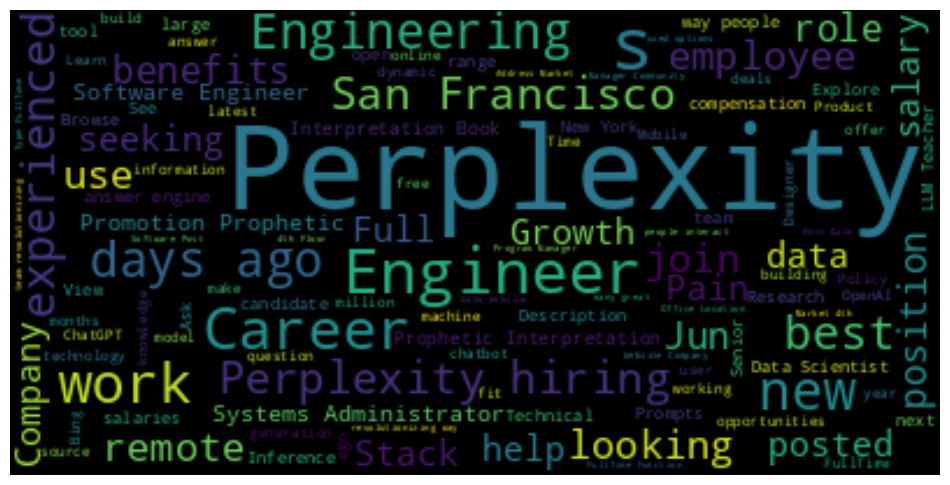

In [7]:
# Convert the "Description" column to a single string
text_data = ' '.join(df['Description'].astype(str))

# Create a word cloud from the descriptions
wordcloud = WordCloud().generate(text_data)

# Visualize the word cloud
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()